***
# AI Team Project
## 16102269 Kim Jong Gyu
## 19102095 Lee Do Hui
***

# **1. Motivation For The Proeject**
# **2. Problem Description**
# **3. Data Description**
*   ~~Preferentially, I use braille notation in English dataset in Kaggle~~
  *   ~~Reference : https://www.kaggle.com/code/kwisatzhaderach/braille-classifier-keras/data~~
*   We use 

# **4. Detection Processing**

# **4-1. Exisiting Model**

In [2]:
# Existing Model
from google.colab import drive

drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [4]:
ls

gdrive/  images/  sample_data/


In [5]:
import os
import numpy as np
import pandas as pd
from shutil import copyfile

alpha = 'a'
for i in range(0, 26): 
    os.mkdir('./images/' + alpha)
    alpha = chr(ord(alpha) + 1)

rootdir = '/content/gdrive/MyDrive/AI/AI_TeamProjeect/Braille Dataset/Braille Dataset/'
for file in os.listdir(rootdir):
    letter = file[0]
    copyfile(rootdir+file, './images/' + letter + '/' + file) 

FileExistsError: ignored

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=20,
                             shear_range=10,
                             validation_split=0.2)

train_generator = datagen.flow_from_directory('./images/',
                                              target_size=(28,28),
                                              subset='training')

val_generator = datagen.flow_from_directory('./images/',
                                            target_size=(28,28),
                                            subset='validation')

Found 1248 images belonging to 26 classes.
Found 312 images belonging to 26 classes.


In [ ]:
from keras import backend as K
from keras import layers as L
from keras.models import Model,load_model
from keras.regularizers import l2
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,EarlyStopping

K.clear_session()

model_ckpt = ModelCheckpoint('BrailleNet.h5',save_best_only=True)
reduce_lr = ReduceLROnPlateau(patience=8,verbose=0)
early_stop = EarlyStopping(patience=15,verbose=1)

entry = L.Input(shape=(28,28,3))
x = L.SeparableConv2D(64,(3,3),activation='relu')(entry)
x = L.MaxPooling2D((2,2))(x)
x = L.SeparableConv2D(128,(3,3),activation='relu')(x)
x = L.MaxPooling2D((2,2))(x)
x = L.SeparableConv2D(256,(2,2),activation='relu')(x)
x = L.GlobalMaxPooling2D()(x)
x = L.Dense(256)(x)
x = L.LeakyReLU()(x)
x = L.Dense(64,kernel_regularizer=l2(2e-4))(x)
x = L.LeakyReLU()(x)
x = L.Dense(26,activation='softmax')(x)

model = Model(entry,x)
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit_generator(train_generator,validation_data=val_generator,epochs=666,
                              callbacks=[model_ckpt,reduce_lr,early_stop],verbose=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 68: early stopping


In [ ]:
model = load_model('BrailleNet.h5')
acc = model.evaluate_generator(val_generator)[1]
print('model accuracy: {}'.format(round(acc,4)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


model accuracy: 0.9295


# **4-2. New Model**

In [6]:
from google.colab import drive

drive.mount('/content/drive',force_remount=True)


Mounted at /content/drive


(1) 데이터 부풀리기

In [40]:
import os

file_path = '/content/drive/MyDrive/AI_TeamProject/AI-teamProject-brailleTranslation'

def createFolder(directory):
      if not os.path.exists(directory):
          os.makedirs(directory)

createFolder(file_path+'/new_dataset')

In [42]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

print(tf.__version__)

2.9.2


In [41]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=5,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.05,
        zoom_range=0.01,
        fill_mode='constant',
        cval=255
        )

def newGenerateData():
  files = os.listdir(file_path + '/dataset')
  for file in files:
    if(os.path.splitext(file)[1] == '.png'):
      filename = os.path.splitext(file)[0]
      createFolder(file_path + '/new_dataset/'+ filename)
      img = load_img(file_path+'/dataset/'+file)  # PIL 이미지
      x = img_to_array(img)
      x = x.reshape((1,) + x.shape)
      if file == 'space.png':
        import shutil
        for _ in range(10):
          print(_,file, file_path +'/dataset/'+file)
          shutil.copy(file_path+'/dataset/'+file, file_path + '/new_dataset/'+ filename + '/' + filename + str(_) + '.jpg')
      else:
        i = 0
        for batch in datagen.flow(x, batch_size=1, save_to_dir= file_path + '/new_dataset/'+ filename, save_prefix=filename, save_format='jpg'):
          i += 1
          if i > 20:
            break  # 이미지 20장을 생성하고 마칩니다

newGenerateData()


0 space.png /content/drive/MyDrive/AI_TeamProject/AI-teamProject-brailleTranslation/dataset/space.png
1 space.png /content/drive/MyDrive/AI_TeamProject/AI-teamProject-brailleTranslation/dataset/space.png
2 space.png /content/drive/MyDrive/AI_TeamProject/AI-teamProject-brailleTranslation/dataset/space.png
3 space.png /content/drive/MyDrive/AI_TeamProject/AI-teamProject-brailleTranslation/dataset/space.png
4 space.png /content/drive/MyDrive/AI_TeamProject/AI-teamProject-brailleTranslation/dataset/space.png
5 space.png /content/drive/MyDrive/AI_TeamProject/AI-teamProject-brailleTranslation/dataset/space.png
6 space.png /content/drive/MyDrive/AI_TeamProject/AI-teamProject-brailleTranslation/dataset/space.png
7 space.png /content/drive/MyDrive/AI_TeamProject/AI-teamProject-brailleTranslation/dataset/space.png
8 space.png /content/drive/MyDrive/AI_TeamProject/AI-teamProject-brailleTranslation/dataset/space.png
9 space.png /content/drive/MyDrive/AI_TeamProject/AI-teamProject-brailleTranslatio

(2) Generator에 넣어 학습 준비

In [43]:
from keras_preprocessing.image import ImageDataGenerator

def data_ready():
    images_dir = '/content/drive/MyDrive/AI_TeamProject/AI-teamProject-brailleTranslation/new_dataset'

    datagen = ImageDataGenerator(rotation_range=5,
                                 shear_range=5,
                                 validation_split=0.2,
                                 ) #20%를 검증모델로 사용.

    train_generator = datagen.flow_from_directory(images_dir,
                                                  target_size=(36,36),
                                                  subset='training')

    val_generator = datagen.flow_from_directory(images_dir,
                                                target_size=(36,36),
                                                subset='validation')

    return train_generator, val_generator

def load_image(img_path):
    images_dir = img_path
    datagen = ImageDataGenerator()
    real_generator = datagen.flow_from_directory(images_dir,
                                                 target_size=(36, 36))

    return real_generator

(3) 모델 생성 

In [49]:
from tensorflow.keras import backend as K
from tensorflow.keras import layers as L
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,EarlyStopping

def Make_model(train,val):
    K.clear_session()

    model_ckpt = ModelCheckpoint('/content/drive/MyDrive/AI_TeamProject/AI-teamProject-brailleTranslation/BrailleNet.h5',save_best_only=True)
    reduce_lr = ReduceLROnPlateau(patience=8,verbose=1)
    early_stop = EarlyStopping(patience=5,verbose=2,monitor='accuracy')

    entry = L.Input(shape=(36,36,3))
    x = L.SeparableConv2D(128, (10,10), activation='relu', padding='same')(entry)
    x = L.MaxPooling2D((2, 2))(x)
    x = L.SeparableConv2D(256,(10,10),activation='relu',padding ='same')(x)
    x = L.MaxPooling2D((2,2))(x)
    x = L.SeparableConv2D(512,(10,10),activation='relu',padding ='same')(x)
    x = L.GlobalMaxPooling2D()(x)

    x = L.Dense(512)(x)
    x = L.LeakyReLU()(x)
    x = L.Dense(256)(x)
    x = L.ReLU()(x)
    x = L.Dense(128,kernel_regularizer=l2(2e-4))(x)
    x = L.ReLU()(x)
    x = L.Dense(43,activation='softmax')(x)

    model = Model(entry,x)
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

    history = model.fit_generator(train,validation_data=val,epochs=60,
                                  callbacks=[model_ckpt,reduce_lr,early_stop],verbose=2)
    return history


(4) 모델 결과 도식화

In [45]:
def print_acc_loss(history):
    # 평가 결과 도식화
    import matplotlib.pyplot as plt
    fig, loss_ax = plt.subplots(figsize=(10, 5))
    acc_ax = loss_ax.twinx()
    loss_ax.plot(history.history['loss'], 'y', label='train loss')
    loss_ax.plot(history.history['val_loss'], 'r', label='val loss')
    acc_ax.plot(history.history['accuracy'], 'b', label='train acc')
    acc_ax.plot(history.history['val_accuracy'], 'g', label='val acc')
    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    acc_ax.set_ylabel('accuray')
    loss_ax.legend(loc='upper left')
    acc_ax.legend(loc='lower left')

    plt.show()

(5) 모델 불러오기 , 정확도 확인

In [50]:
def load_model(model_name):
    from keras.models import load_model
    model = load_model('/content/drive/MyDrive/AI_TeamProject/AI-teamProject-brailleTranslation/' + model_name)
    return model

def acc_chk(model, val):
    acc = model.evaluate_generator(val)[1]
    print('model accuracy: {}'.format(round(acc,4)))

(6) 학습 시작

In [24]:
os.getcwd()

'/content'

In [47]:
train_generator, val_generator = data_ready()

Found 721 images belonging to 43 classes.
Found 170 images belonging to 43 classes.


In [48]:
hist = Make_model(train_generator,val_generator)

<ipython-input-44-8130571935c4>:33: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train,validation_data=val,epochs=60,


Epoch 1/60
23/23 - 10s - loss: 3.8048 - accuracy: 0.0194 - val_loss: 3.7674 - val_accuracy: 0.0471 - lr: 0.0010 - 10s/epoch - 421ms/step
Epoch 2/60
23/23 - 7s - loss: 3.6046 - accuracy: 0.0666 - val_loss: 3.1403 - val_accuracy: 0.1294 - lr: 0.0010 - 7s/epoch - 317ms/step
Epoch 3/60
23/23 - 7s - loss: 2.3632 - accuracy: 0.3454 - val_loss: 1.3565 - val_accuracy: 0.6059 - lr: 0.0010 - 7s/epoch - 318ms/step
Epoch 4/60
23/23 - 8s - loss: 0.9654 - accuracy: 0.7282 - val_loss: 0.7597 - val_accuracy: 0.7588 - lr: 0.0010 - 8s/epoch - 340ms/step
Epoch 5/60
23/23 - 8s - loss: 0.4387 - accuracy: 0.8544 - val_loss: 0.2927 - val_accuracy: 0.8706 - lr: 0.0010 - 8s/epoch - 335ms/step
Epoch 6/60
23/23 - 9s - loss: 0.1665 - accuracy: 0.9459 - val_loss: 0.1934 - val_accuracy: 0.9412 - lr: 0.0010 - 9s/epoch - 385ms/step
Epoch 7/60
23/23 - 7s - loss: 0.1550 - accuracy: 0.9570 - val_loss: 0.2789 - val_accuracy: 0.9118 - lr: 0.0010 - 7s/epoch - 318ms/step
Epoch 8/60
23/23 - 8s - loss: 0.2290 - accuracy: 0.94

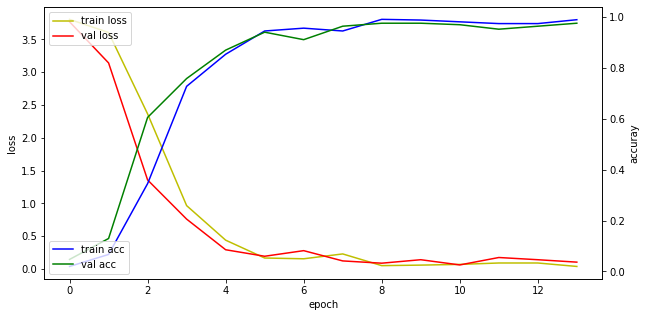

In [51]:
print_acc_loss(hist)

In [52]:
model = load_model('BrailleNet.h5')
acc_chk(model, val_generator)

<ipython-input-50-1d6df054a99d>:7: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc = model.evaluate_generator(val)[1]


model accuracy: 0.9765


(6) Test

In [53]:
import PIL.Image as Img
import numpy as np

def get_test_img(path):
  img = Img.open(path).convert('RGB')
  img = img.resize((36,36))
  x = img_to_array(img)
  x = x.reshape((1,) + x.shape)

  return x

test_image = get_test_img('/content/drive/MyDrive/AI_TeamProject/AI-teamProject-brailleTranslation/dataset/b.png')
result = model.predict(test_image)

max = np.max(result)
index = np.where(result == max)

print(max, *index[1])

1/1 [==============================] - 0s 84ms/step
0.99999714 11


In [57]:
dir = os.listdir('/content/drive/MyDrive/AI_TeamProject/AI-teamProject-brailleTranslation/dataset')
tmp = []
for file in dir:
  if(os.path.splitext(file)[1] == '.png'):
    tmp.append(file.split('.')[0])
dir = tmp
dir.sort()
del dir[dir.index('space')]
print(dir)

def decode_predict(result,lables):
  max = np.max(result)
  index = np.where(result == max)
  # print(index[1])
  # print(tags[index[1][0]])

  return lables[index[1][0]]


test_image = get_test_img('/content/drive/MyDrive/AI_TeamProject/AI-teamProject-brailleTranslation/new_dataset/k/k_0_2107.png')
result = model.predict(test_image)
decoded = decode_predict(result, lables=dir)

print(f'predicted! : {decoded}')

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'comma', 'd', 'decimal_point', 'e', 'exclamation_point', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'period', 'q', 'question_mark', 'r', 's', 't', 'u', 'upper', 'v', 'w', 'x', 'y', 'z']
1/1 [==============================] - 0s 15ms/step
predicted! : k


In [58]:
!git config --global user.email 'whdrb2643@gmail.com'
!git config --global user.name 'Kim-Jong-Gyu'

In [ ]:
!git config --global user.email 'whdrb2643@gmail.com'
!git config --global user.name 'Kim-Jong-Gyu'
!git add -A